# Prøve-eksamen i Fys1120 H2022 - oppgave 1

Dette oppgavesettet tilsvarer en av to oppgaver som dere vil få til eksamen. (Denne oppgaven er stor, så den andre oppgaven vil være mindre). Hver oppgave på eksamen vil bestå av en Jupyter-notebook som dette. Dere arbeider med oppgaven i notebook'en og leverer notebook'en som en pdf file ved å lagre notebook'en og så laste den opp i inspera.

Dere vil kunne får både teori-oppgaver, programmerings-oppgaver og diskusjons-oppgaver som del av eksamen. Alle svarene skal dere skrive i den samme notebook'en.

## Elektrisk potensial og felt rundt en ringladning
Vi skal i denne oppgaven studere det elektriske potensialet rundt en ringformet ladning med radius $a$ som ligger i $xy$-planet. Ringen har en total ladning $q$ som er uniformt fordelt på ringen.

### Oppgave (a) 
Vis at det elektriske potensialet $V(z)$ langs $z$-aksen er gitt som
$$V(z) = \frac{q}{4 \pi \epsilon_0 (a^2 + z^2)^{1/2}}$$
(Du kan ikke levere en figur, så du må forklare hva du gjør med ord og matematiske uttrykk.)

(*Svar ved å trykke i denne cellen og skriv svaret her*)

(__Tips__ Du kan trykke på oppgave-cellene også og kopiere LaTeX koden derfra hvis du trenger den)

(*Løsning*) Vi bruker superposisjonsprinsippet og uttrykket for det elektriske potensialet fra en punktladning. 

En ladning $dq$ i posisjonen $\phi$ langs sirkelen, hvor vinkelen måles fra $x$-aksen, gir opphav til et elektrisk potensial
$$dV = \frac{d q}{4 \pi \epsilon_0 R}$$
i et punkt $\vec{r}$. Her er $\vec{R} = \vec{r} - \vec{r}'$ hvor $\vec{r}' = (a\cos \phi, a\sin \phi, 0)$. For et punkt langs $z$-aksen er derfor $\vec{R} = (0,0,z) - (a\cos \phi, a\sin \phi, 0)$ slik at $R = (a^2 + z^2)^{1/2}$. Dermed er
$$dV = \frac{d q}{4 \pi \epsilon_0 (a^2 + z^2)^{1/2}}$$
Dette uttrykket er ikke avhengig av vinkelen $\phi$. Vi integrerer (summerer) over alle bidragene $dq$ og finner da
$$V = \int d V = \frac{q}{4 \pi \epsilon_0 (a^2 + z^2)^{1/2}}$$

### Eksempel
Som en hjelp til å løse oppgaven, kan du ta utgangspunkt i dette eksempelet.

Det elektriske potensialet fra en dipol langs $z$-aksen kan beregnes og visualiseres ved hjelp av følgende program.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
def epotlist(r,Q,R):
    epsilon0 = 8.854e-12
    K = 1.0/(4.0*np.pi*epsilon0)
    V = 0
    for i in range(len(R)):
        Ri = r - R[i]
        qi = Q[i]
        Rinorm = np.linalg.norm(Ri)
        V = V + qi/Rinorm
    V = V*K
    return V
def findpot(R,Q,x0,x1,z0,z1,Nx,Nz): 
    x = np.linspace(x0,x1,Nx)
    z = np.linspace(z0,z1,Nz)
    rx,rz = np.meshgrid(x,z)
    V = np.zeros((Nx,Nz),float)
    for i in range(len(rx.flat)):
        r = np.array([rx.flat[i],0,rz.flat[i]])
        V.flat[i] = epotlist(r,Q,R) 
    return x,z,rx,rz,V

In [17]:
Q = []
R = []
a = 1.0
q = 1.0
R.append(np.array([0,0,-a/2]))
Q.append(-q)
R.append(np.array([0,0,a/2]))
Q.append(q)
x,z,rx,rz,V = findpot(R,Q,-1*a,1*a,-1*a,1*a,30,30)

(-1.1, 1.1, -1.1, 1.1)

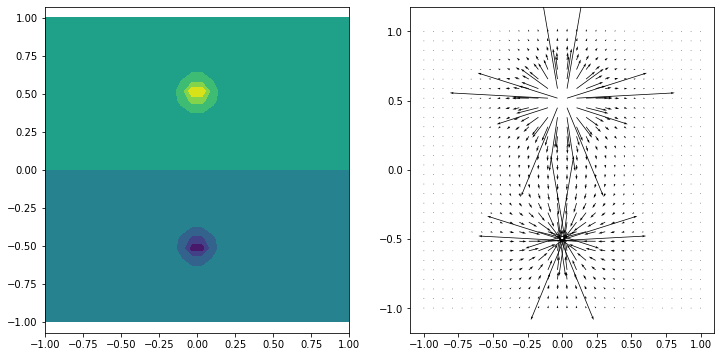

In [18]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.contourf(rx,rz,V)
plt.axis('equal')
plt.subplot(1,2,2)
Ez,Ex = np.gradient(-V)
plt.quiver(rx,rz,Ex,Ez)
plt.axis('equal')

## Sirkelladning
Vi skal nå se på en ladning formet som en sirkel med radius $a = 1 \text{cm}$ i $xy$-planet. Hele sirkelen har ladningen $q = 1 \text{mC}$.

### Oppgave (b)

Skriv et program som finner det elektriske potensialet i $xy$-planet og i $xz$-planet og visualiser potensialet og feltet i et område som illustrerer oppførselen godt.

In [4]:
# (Svar)

In [32]:
# (Løsning)
Q = []
R = []
a = 1.0e-2
q = 1.0e-3
N = 200 # Antall punkter
for iz in range(N+1):
    z = 0
    phi_i = iz/(N+1)*(2*np.pi)
    x = a*np.cos(phi_i)
    y = a*np.sin(phi_i)
    R.append(np.array([x,y,z]))
    Q.append(q/(N+1))

In [33]:
def findpot_xz(R,Q,x0,x1,z0,z1,Nx,Nz): 
    x = np.linspace(x0,x1,Nx)
    z = np.linspace(z0,z1,Nz)
    rx,rz = np.meshgrid(x,z)
    V = np.zeros((Nx,Nz),float)
    for i in range(len(rx.flat)):
        r = np.array([rx.flat[i],0,rz.flat[i]])
        V.flat[i] = epotlist(r,Q,R) 
    return x,z,rx,rz,V
def findpot_xy(R,Q,x0,x1,y0,y1,Nx,Ny): 
    x = np.linspace(x0,x1,Nx)
    y = np.linspace(y0,y1,Ny)
    rx,ry = np.meshgrid(x,y)
    V = np.zeros((Nx,Ny),float)
    for i in range(len(rx.flat)):
        r = np.array([rx.flat[i],ry.flat[i],0])
        V.flat[i] = epotlist(r,Q,R) 
    return x,y,rx,ry,V

(-0.010998717497876858,
 0.010999938928470327,
 -0.01099966410145826,
 0.01099966410145826)

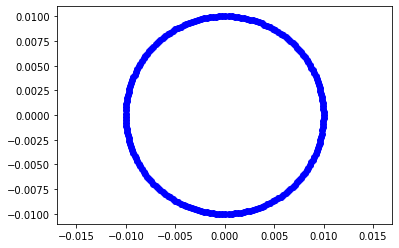

In [34]:
# Vi sjekker at vi har fått riktige punkter ved å plotte dem i xy-planet
for i in range(len(R)):
    ri = R[i]
    plt.plot(ri[0],ri[1],'ob')
plt.axis('equal')

In [35]:
# Vi finner potensialet i xy planet
x,y,rx,ry,V_xy = findpot_xy(R,Q,-1.5*a,1.5*a,-1.5*a,1.5*a,30,30)
Ey,Ex = np.gradient(-V_xy)

In [36]:
# Vi plotter potensialet og feltet i xy planet
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.contourf(rx,ry,V_xy)
plt.axis('equal')
for i in range(len(R)):
    ri = R[i]
    plt.plot(ri[0],ri[1],'.r')
plt.subplot(1,2,2)
plt.quiver(rx,ry,Ex,Ey)
plt.axis('equal')
for i in range(len(R)):
    ri = R[i]
    plt.plot(ri[0],ri[1],'.r')

In [38]:
# Vi finner potensialet i xz planet
x,z,rx,rz,V_xz = findpot_xz(R,Q,-1.5*a,1.5*a,-1.5*a,1.5*a,30,30)
Ez,Ex = np.gradient(-V_xz)

(-0.0165, 0.0165, -0.0165, 0.0165)

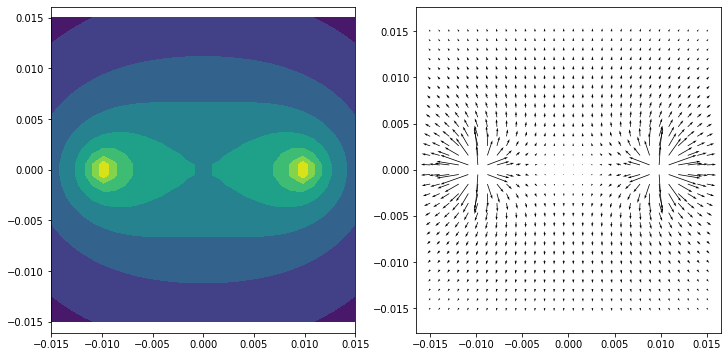

In [39]:
# Vi plotter potensialet og feltet i xz planet
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.contourf(rx,rz,V_xz)
plt.axis('equal')
plt.subplot(1,2,2)
plt.quiver(rx,rz,Ex,Ez)
plt.axis('equal')

## Sammenlikning med teori nær $z$-aksen

### Oppgave (c)
Vi ønsker å sammenlikne det eksakte resutatet vi fant langs $z$-aksen med resultatet fra programmet ditt nær $z$-aksen for å se hvor stor feil vi får hvis vi bruker det eksakte resultet i et område hvor det ikke er gyldig. Lag et plot av $V(a/2,0,z)$ og sammenlikn med det eksakte resultatet i $(0,0,z)$ for $z = -2a$ til $z=2a$. Kommenter kort resultatet.

In [9]:
# (Svar)

Text(0, 0.5, '$V$ (V)')

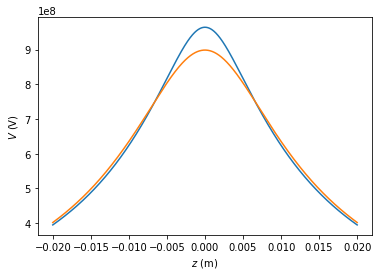

In [43]:
# (Løsning)
# Først finner vi den numeriske løsningen
xi = a/2
yi = 0
Nz = 1000
z = np.zeros(Nz+1)
V = np.zeros(Nz+1)
for iz in range(Nz+1):
    zi = -2*a + (iz/Nz)*(4*a)
    z[iz] = zi
    ri = np.array([xi,yi,zi])
    Vi = epotlist(ri,Q,R)
    V[iz] = Vi
plt.plot(z,V)
# Så sammenlikner vi med det eksakte resultatet i x=0
epsilon0 = 8.854e-12
V_teori = q/(4*np.pi*epsilon0*np.sqrt(a*a+z*z))
plt.plot(z,V_teori)#[-a/2,a/2],[Ez_teori,Ez_teori])
plt.xlabel('$z$ (m)')
plt.ylabel('$V$ (V)')

(*Løsning til kommentar*) Vi ser at forskjellen er størst for $z=0$ og at den blir mindre jo større $z$ er. Det kan vi forstå, fordi etterhvert som $z$ blir stor, så vil ringen fremtre mer og mer som en punktladning i origo. Forskjellen i avstand til punktladningen fra punktet $(0,0,z)$ og $(a/5,0,z)$ blir mindre og mindre jo større $z$ er slik at potensialene i disse punktene vil bli mer og mer like jo større $z$ er. (Vi ser også at potensialet er symmetrisk om $z=0$ slik vi forventer fordi ladningsfordelingen er symmetrisk om $xy$-planet, men det vil ikke bli gitt noe ekstra poeng for en slik kommentar om symmetri - det er tilstrekkelig med en kommentar til hvorfor forskjellen blir mindre når $z$ blir større).

## Sammenlikning med teori langt vekk fra linjestykket i $xy$-planet

### Oppgave (d)
Hva forventer du at det elektriske potensialet $V(x,y,0)$ vil være når $r = (x^2+ y^2)^{1/2} r\gg a$? Du skal komme fram til et enkelt uttrykk for $V(r)$ og gi en kort forklaring for hvorfor dette uttrykket er en god tilnærming i den oppgitte grensen. 

(*Svar*)

(*Løsning*) Langt vekk fra ringladningen forventer vi at den vil oppføre seg som en punktladning med ladning $q$ i origo. Potensialet fra en punktladning vil være
$$V(r) = \frac{q}{4 \pi \epsilon_0 r}$$

### Oppgave (e)
Sammenlikn resultatet fra programmet ditt med $V(r)$ for eksempel ved å plotte $V(r)$ for $r = a+a/10$ til $r= 10a$.

In [ ]:
# Svar

/Users/malthe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/malthe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


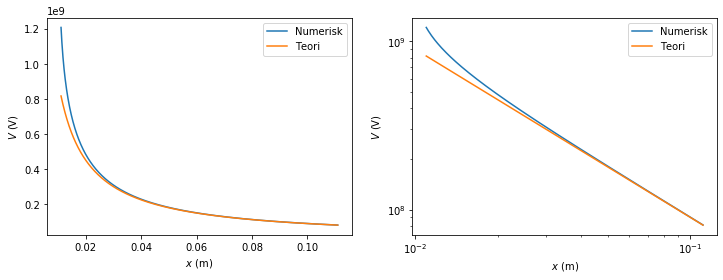

In [47]:
# Løsning
plt.figure(figsize=(12,4))
Nx = 1000
dx = 10*a
x = np.zeros(Nx+1)
Vr = np.zeros(Nx+1)
yi = 0
zi = 0
for ix in range(Nx+1):
    xi = a+0.1*a+(ix/Nx)*dx
    x[ix] = xi
    ri = np.array([xi,0,zi])
    Vi = epotlist(ri,Q,R)
    Vr[ix] = Vi
plt.subplot(1,2,1)
plt.plot(x,Vr,label="Numerisk")
plt.subplot(1,2,2)
plt.loglog(x,Vr,label="Numerisk")
# Så sammenlikner vi med en punktladning
epsilon0 = 8.854e-12
Vr_teori = q/(4*np.pi*epsilon0*x)
plt.subplot(1,2,1)
plt.plot(x,Vr_teori,label="Teori")
plt.xlabel('$x$ (m)')
plt.ylabel('$V$ (V)')
plt.legend()
plt.subplot(1,2,2)
plt.loglog(x,Vr_teori,label="Teori")
plt.xlabel('$x$ (m)')
plt.ylabel('$V$ (V)')
plt.legend()

(*Løsning: Kommentar til plot*) (Vi forventer at du kort kommenterer et slikt plot) Vi ser at den numeriske løsningen for en ring går mot den eksakte løsningen for en punktladning når avstanden blir stor. Vi ser at forskjellen blir ganske liten allerede i en avstand $r = 4a$ fra sentrum av ringen.